# BoomBikes Linear Regression Case Study

**BoomBikes** is US based bike sharing service in which bikes are made available for shared use to individuals on a short term basis for a price or free. 
Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it.
This bike can then be returned to another dock belonging to the same system.

<font color = blue>**Problem Statement**</font><br>

**BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. 
BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

<font color = blue>**Aim of the case study**</font><br>

1. To understand the factors affecting the demand for these shared bikes in the American market. 
   The company wants to know:
    - Which variables are significant in predicting the demand for shared bikes.
    - How well those variables describe the bike demands
2. To create a model for the demand of shared bikes with the available features. 
   It will be used by the company to understand how exactly the demands vary with different features. They can accordingly
   manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further this model is also
   be a good way for company to understand the demand dynamics of a new market. 

### Following are steps used for creation and evaluation of model for case study
- Step 1: Reading and Understanding the Data
- Step 2: Visualising the Data
- Step 3: Data Preparation
- Step 4: Splitting the Data into Training and Testing Sets
- Step 5: Building a linear model
- Step 6: Residual Analysis of the train data
- Step 7: Making Predictions Using the Final Model
- Step 8: Model Evaluation

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset and check the first five rows
bike_df = pd.read_csv("day.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600




Inspect the various aspects of the housing dataframe

In [3]:
# Check the shape of the dataframe
bike_df.shape

(730, 16)

In [4]:
# Check the columns of the dataframe
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Data Understanding

In order to analyse the data and fullfil the aim of the case study it is imperative to understand what data set is all about.
<br>Following is what columns in given data set represents:

##### Columns and their description :

1. **instant** : record index
2. **dteday**  : date
3. **season**  : season (1:spring, 2:summer, 3:fall, 4:winter)
4. **yr**      : year (0: 2018, 1:2019)
5. **mnth**    : month ( 1 to 12)
6. **holiday** : weather day is a holiday or not
7. **weekday** : day of the week (0:Sunday,6:Saturday)
8. **workingday** : if day is neither weekend nor holiday is 1, otherwise is 0.
9. **weathersit** : Weather situation . having 4 values.<br>
                    1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>
		            2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
		            3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
		            4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
10. **temp**   : temperature in Celsius
11. **atemp**  : feeling temperature in Celsius
12. **hum**    : humidity
13. **windspeed** : wind speed
14. **casual**    : count of casual users
15. **registered**: count of registered users
16. **cnt**       : count of total rental bikes including both casual and registered

### Data Handling and Cleaning 

Here following things will be done:
- Check for null values and their handling if required.
- Correcting the data type of categorical columns.
- Renaming the column names like 'yr' to 'year' for better understanding
- Mapping the string values to categorical columns.

In [5]:
# Check for null values
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values in any of the columns.

In [6]:
# Correcting the data type of categorical columns. This is required to identify and analyse the numerical and categorical
# features separately.

cat_var = ['season','yr','mnth','holiday','weekday', 'workingday','weathersit'] 
bike_df[cat_var] = bike_df[cat_var].astype('object')
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    object 
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    object 
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    object 
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(8)
memory usage: 91.4+ KB


In [7]:
# Renaming the column names like 'yr' to 'year' for better understanding.
bike_df = bike_df.rename(columns = {'yr':'year','hum':'humidity','cnt':'count','mnth':'month'})
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   year        730 non-null    object 
 4   month       730 non-null    object 
 5   holiday     730 non-null    object 
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    object 
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  count       730 non-null    int64  
dtypes: float64(4), int64(4), object(8)
memory usage: 91.4+ KB


Here now datatype of categorical variables have been changed to object. Column names are also renamed

In [8]:
# Mapping the string values to categorical columns ( season. weathersit and weekday). Rest all columns are self explanatory.

bike_df.season = bike_df.season.map({1:'Spring', 2: 'Summer',3:'Fall',4:'Winter'})
bike_df.weathersit = bike_df.weathersit.map({1:'Clear + Partly Cloudy', 2: 'Mist + Cloudy',3:'Light Snow',4:'Heavy Rain'})
bike_df.weekday = bike_df.weekday.map({0:'Sunday', 1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})
bike_df.month = bike_df.month.map({1:'January', 2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})
bike_df.head()


,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,Spring,0,January,0,Saturday,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,January,0,Sunday,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,January,0,Monday,1,Clear + Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,January,0,Tuesday,1,Clear + Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,January,0,Wednesday,1,Clear + Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# Dropping column 'instant' as it is just an index no. and will not add any value to our analysis.
# Dropping column 'dteday' as this information is already captured with column year and month.

bike_df = bike_df.drop(columns = ['instant','dteday'])
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    object 
 2   month       730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  count       730 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 80.0+ KB


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

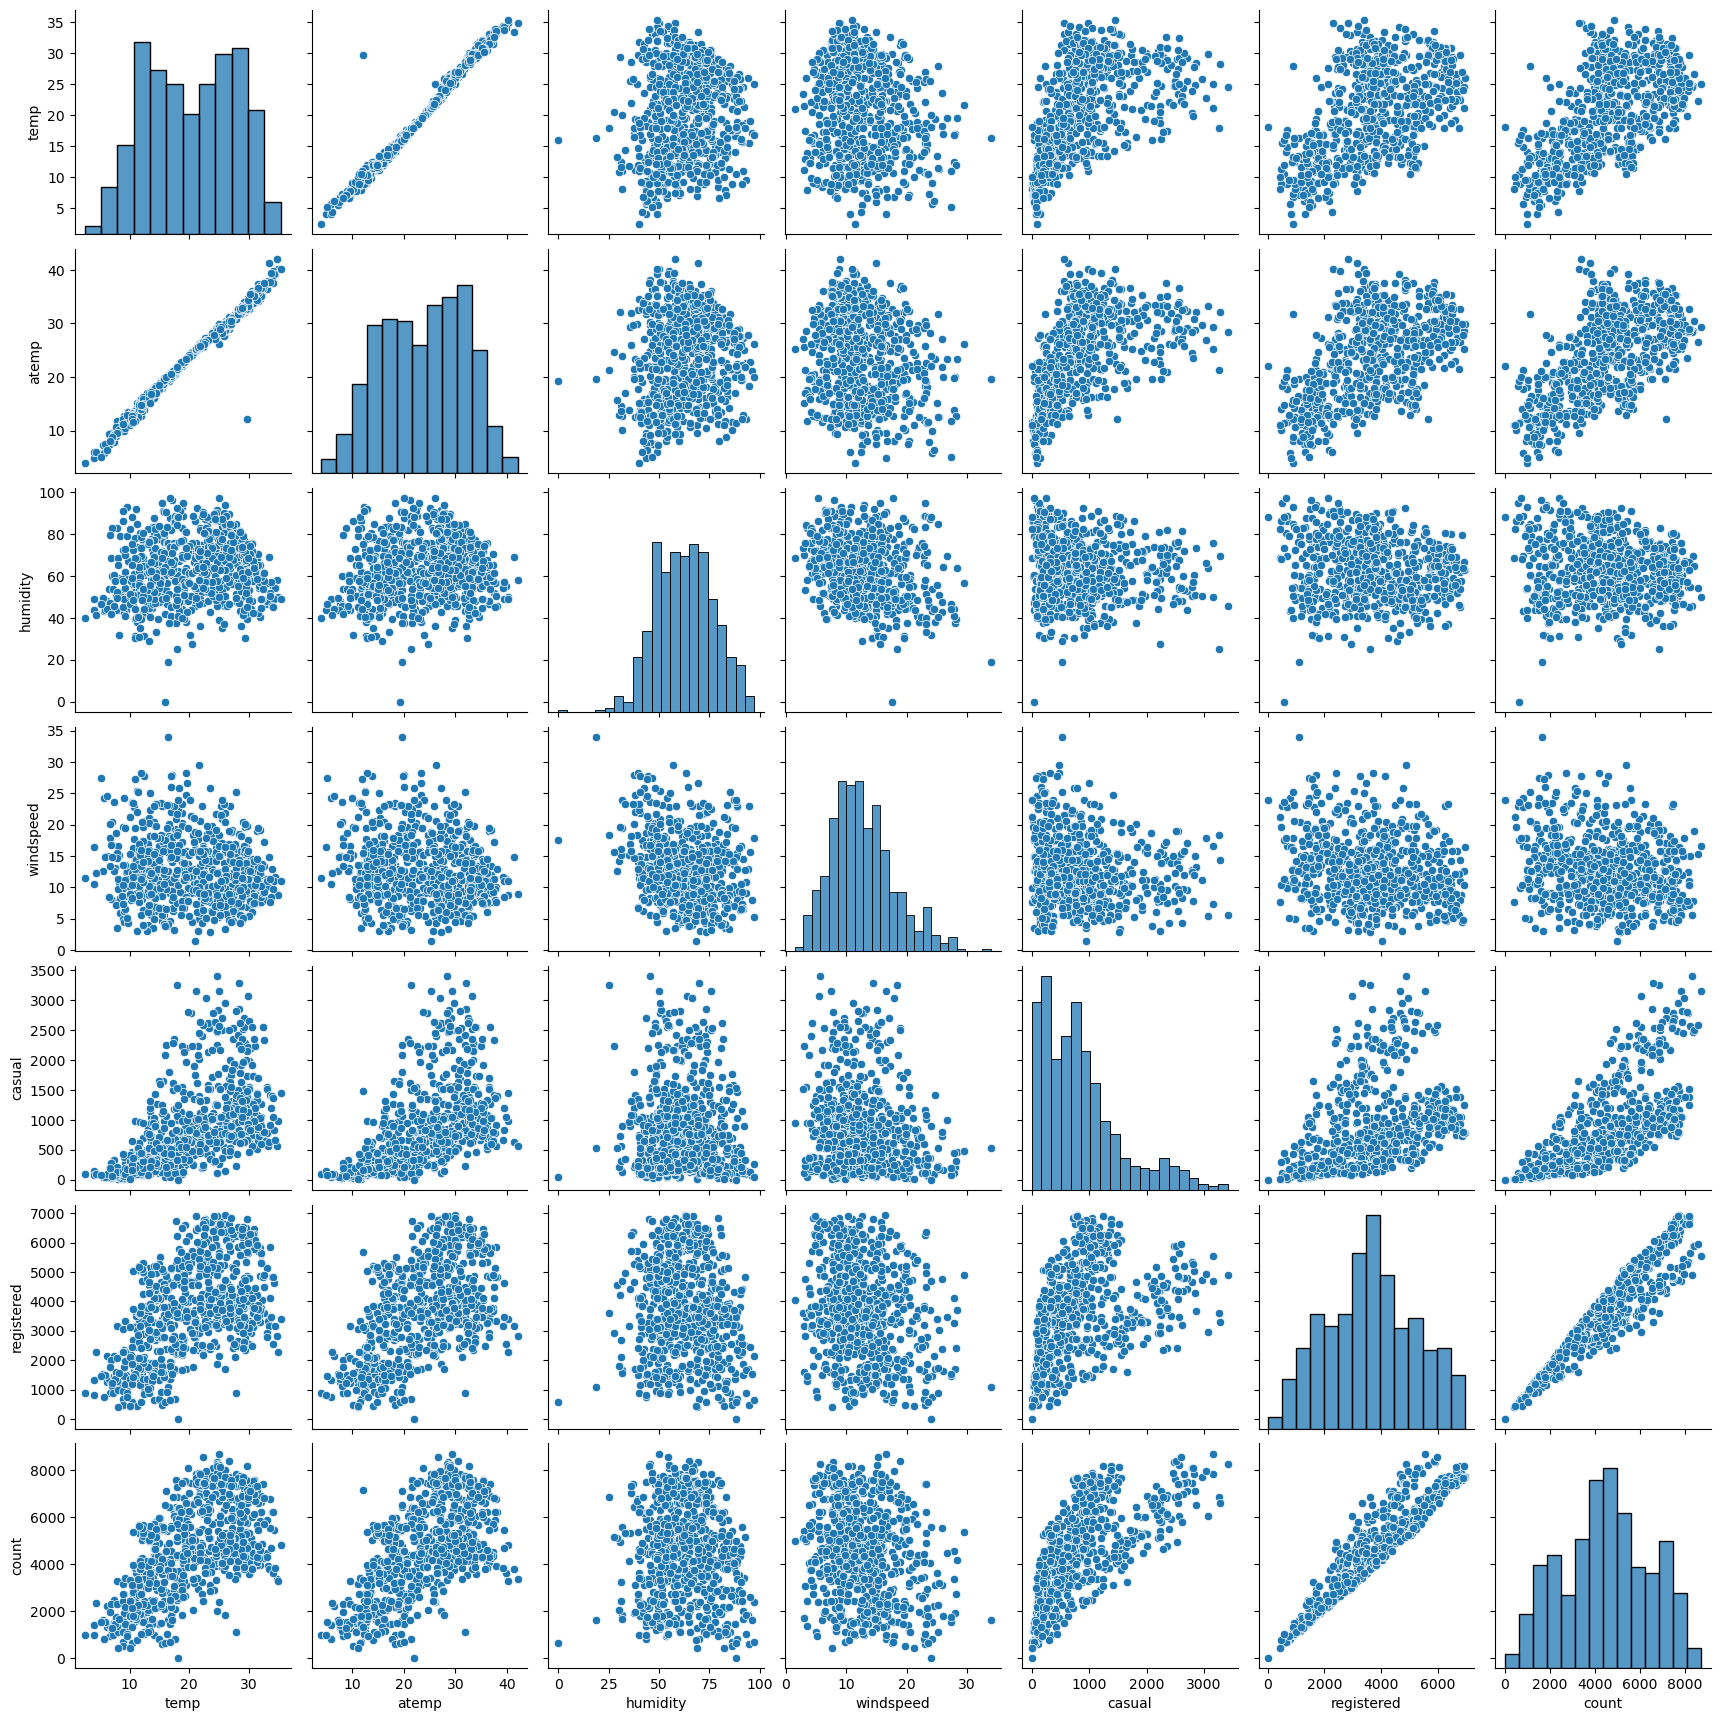

In [10]:
sns.pairplot(bike_df[["temp",'atemp',"humidity","windspeed","casual","registered","count"]])
plt.show()


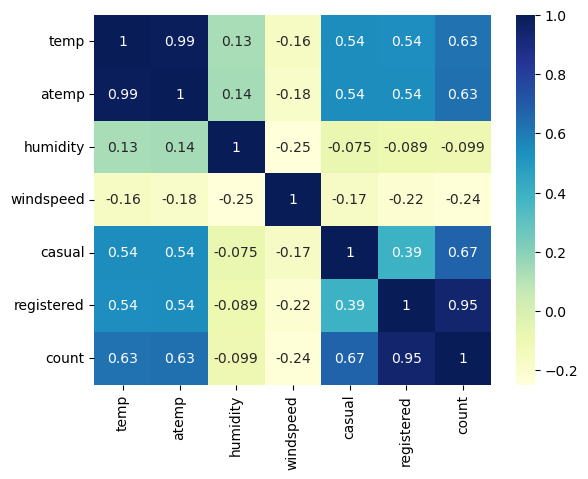

In [11]:
sns.heatmap(bike_df.corr(),annot=True,cmap="YlGnBu")
plt.show()

From the above 2 plots we can infer that:
- `temp` and `atemp` are highly correlated. We can use one of them and drop the other.
- `Casual` and `registered` are also well correlated with `Count`. This is so beacuse casual + registered  = count. So we can 
   drop both `casual` and `registered`. 
- `Count` is having somewhat positive linear relationship with temp and atemp
- With the increase in `windspeed`, count is decreasing


Here we can drop the temp as atemp( apparent temperature ) will impact more the consumption of bike by the users


In [12]:
# As inferred from above plot, dropping columns casual , registered and temp
bike_df = bike_df.drop(columns = ['casual','registered','temp'])
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    object 
 2   month       730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   humidity    730 non-null    float64
 9   windspeed   730 non-null    float64
 10  count       730 non-null    int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 62.9+ KB


#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

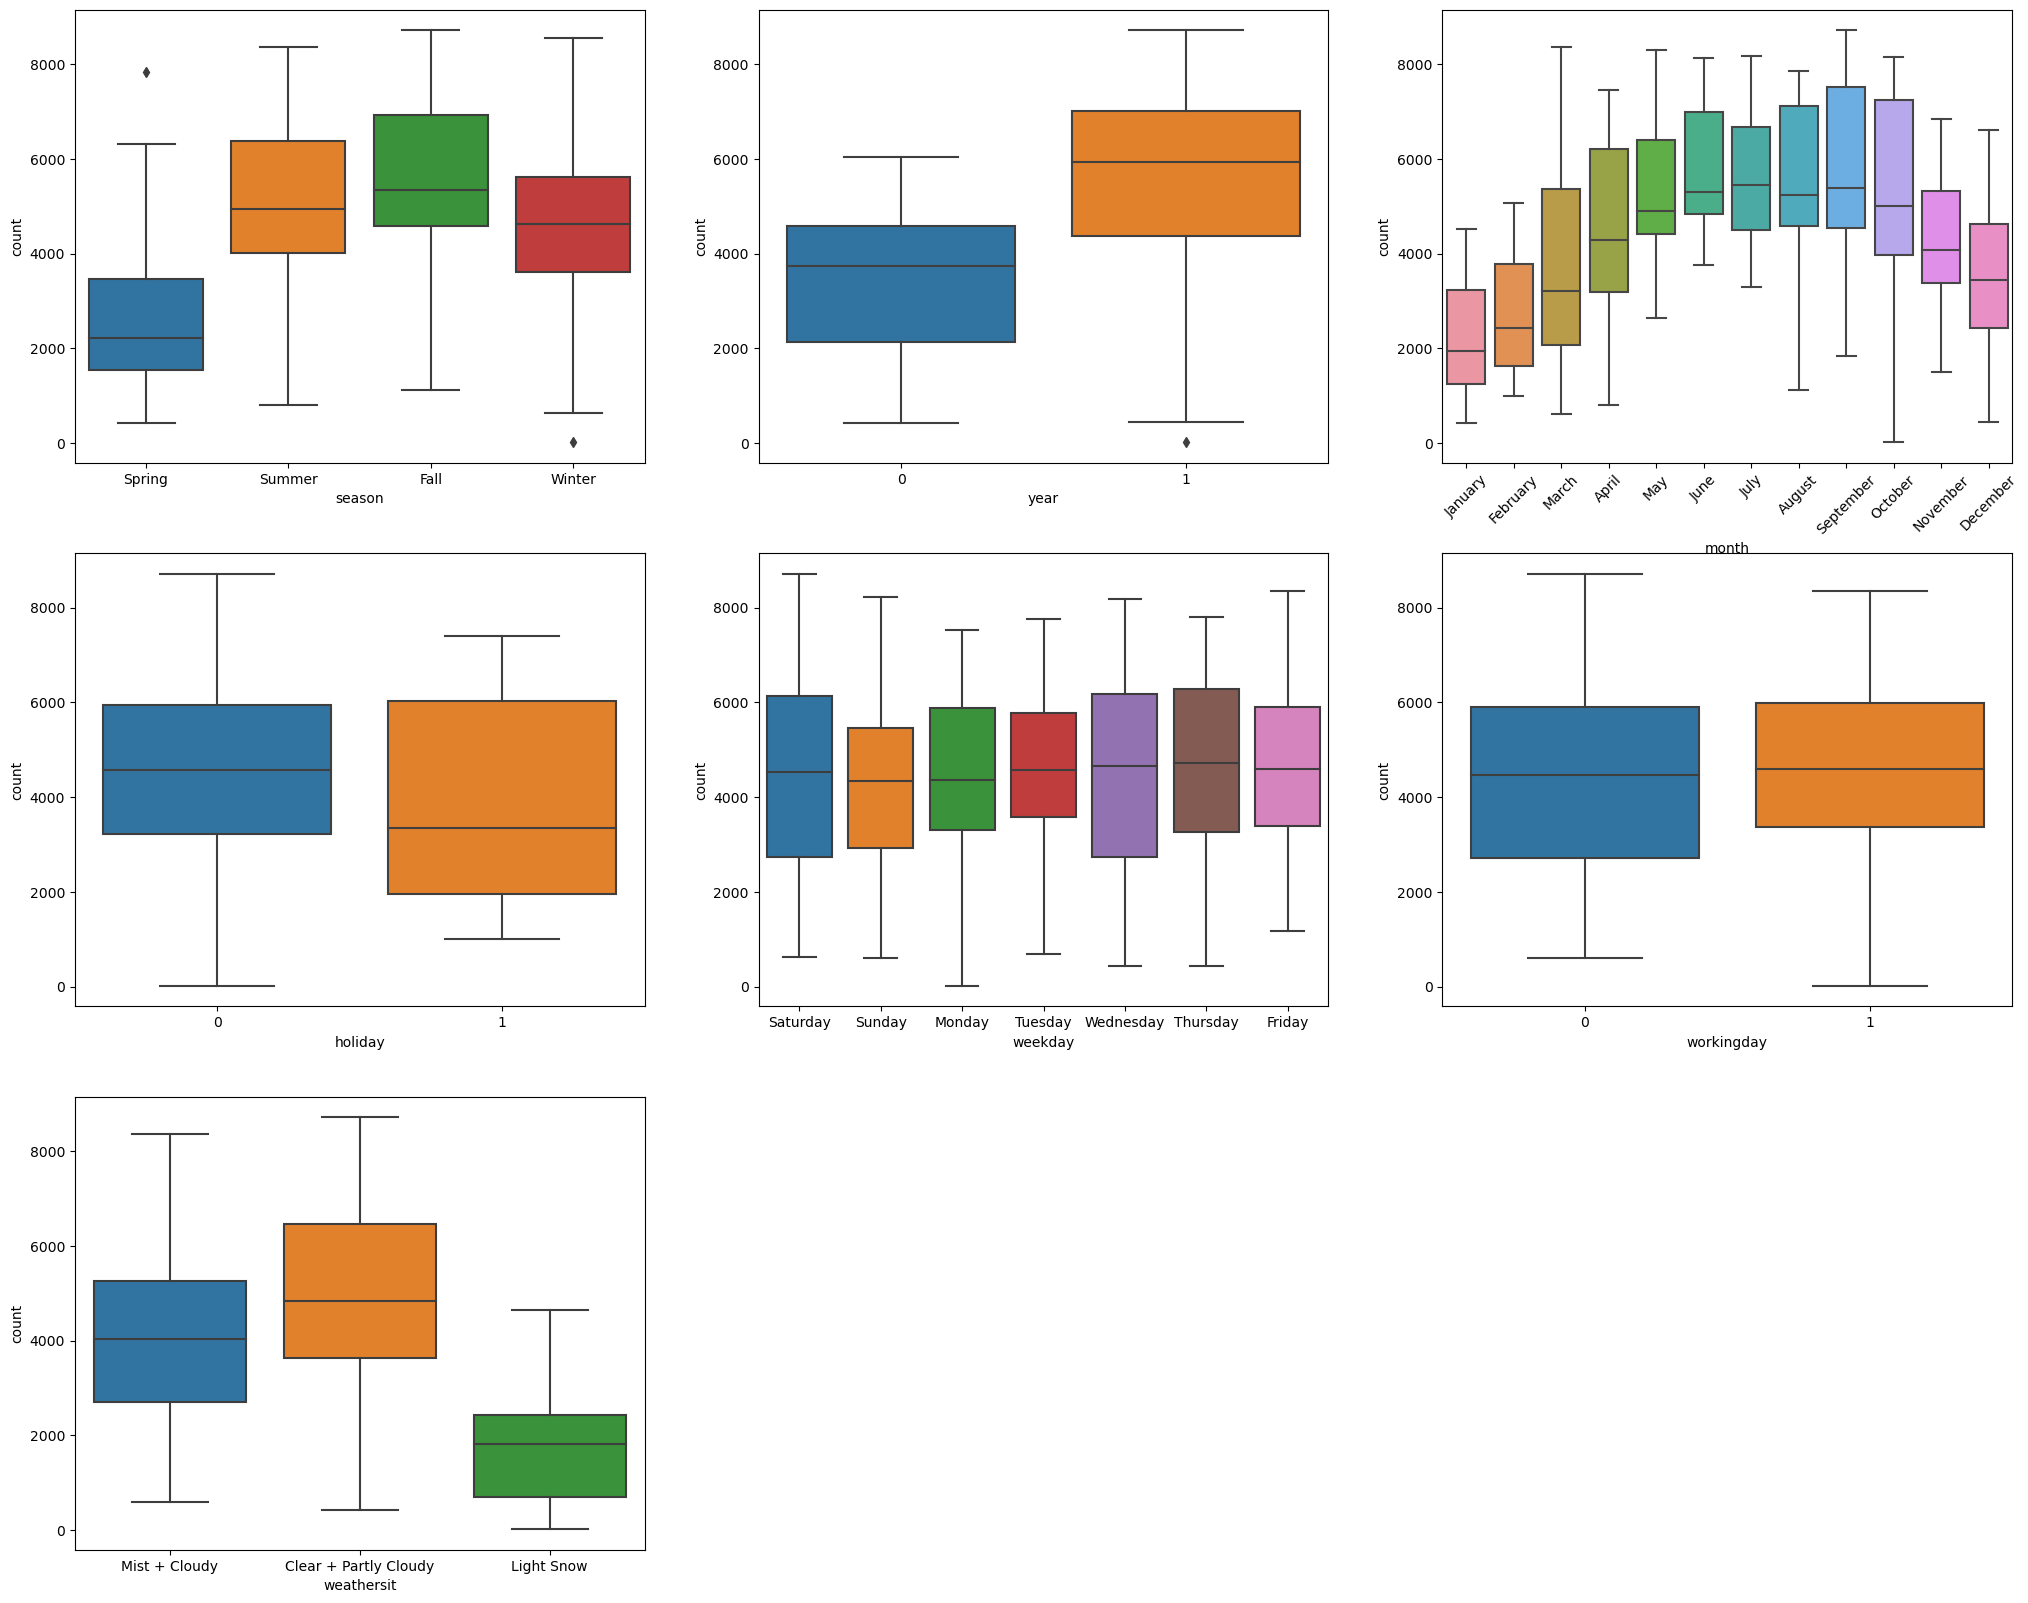

In [13]:
plt.figure(figsize=(25, 20))

plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'count', data = bike_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'year', y = 'count', data = bike_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'month', y = 'count', data = bike_df)
plt.xticks(rotation=45)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'count', data = bike_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'count', data = bike_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'count', data = bike_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'count', data = bike_df)
plt.show()

From the above plots we can infer that:

- In `Fall` season, average bike rentals are highest , followed by `summer` and then `winter`.
- Year with value `1` i.e  `2019` is having more bike rentals.
- Months from `may to october` are having average bike rentals ~ around 5k.
- There is not much difference in the mean bike rentals on week day or weekend.
- Average bike rented on non-holiday days are more.
- There are more bike rented when weather is `clear and partly cloudy`, followed by `misty and cloudy weather`.

There seems to be some outliers in season `spring` and `winter`, year `2019` and quarter `q1` and `q2`.<br>
Lets see what these are:

In [14]:
print('Spring season Outlier')
print( bike_df[(bike_df.season == 'Spring') & (bike_df['count'] > 7000 )].value_counts() )
print(' ')
print('Winter season Outlier')
print(bike_df[(bike_df.season == 'Winter') & (bike_df['count'] < 50 )].value_counts())


Spring season Outlier
season  year  month  holiday  weekday   workingday  weathersit     atemp    humidity  windspeed  count
Spring  1     March  0        Saturday  0           Mist + Cloudy  25.2523  75.5833   7.417168   7836     1
dtype: int64
 
Winter season Outlier
season  year  month    holiday  weekday  workingday  weathersit  atemp  humidity  windspeed  count
Winter  1     October  0        Monday   1           Light Snow  21.97  88.0      23.9994    22       1
dtype: int64


**Since we have small data set, we are not going to delete the outliers. Also we will be using standard scaling, it is more robust for the outliers.**

## Step 3: Data Preparation



### Dummy Variables

The variable `season` has 4 levels. We need to convert these levels into integer as well. 
For this, we will use something called `dummy variables`.

Similarly the variable `Month` has 12 levels, variable `weekday` has 7 levels and variable `weathersit` has 4 levels.
We will convert all of them using `dummy variables`.

Since `holiday`, `year`, `workingday` are already having binary values, we can keep them as it is.


In [15]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
bike_df = pd.get_dummies(data = bike_df, columns = ['season','month','weekday','weathersit'], drop_first = True)
bike_df.head()

,year,holiday,workingday,atemp,humidity,windspeed,count,season_Spring,season_Summer,season_Winter,...,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist + Cloudy
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
bike_df.columns

Index(['year', 'holiday', 'workingday', 'atemp', 'humidity', 'windspeed',
       'count', 'season_Spring', 'season_Summer', 'season_Winter',
       'month_August', 'month_December', 'month_February', 'month_January',
       'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [17]:
# Changing all data types to numeric

bike_df = bike_df.apply(pd.to_numeric)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      730 non-null    int64  
 1   holiday                   730 non-null    int64  
 2   workingday                730 non-null    int64  
 3   atemp                     730 non-null    float64
 4   humidity                  730 non-null    float64
 5   windspeed                 730 non-null    float64
 6   count                     730 non-null    int64  
 7   season_Spring             730 non-null    uint8  
 8   season_Summer             730 non-null    uint8  
 9   season_Winter             730 non-null    uint8  
 10  month_August              730 non-null    uint8  
 11  month_December            730 non-null    uint8  
 12  month_February            730 non-null    uint8  
 13  month_January             730 non-null    uint8  
 14  month_July

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [18]:
import sklearn
from sklearn.model_selection import train_test_split


# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)
print(f'Shape of Train data set : ',df_train.shape)
print(f'Shape of Test data set : ', df_test.shape)

Shape of Train data set :  (510, 29)
Shape of Test data set :  (219, 29)


### Rescaling the Features 

Here we can see that except for `temp`,`humidity`,`windspeed` and `count`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might cause issues at the time of model evaluation. We should therefore use standardization or normalization so that units of the coefficients obtained are all on the same scale. <br>
Here we have two common ways of rescaling:

1. Min-Max scaling ( normailzation) ( x-xmin)/(xmax - xmin)
2. Standardisation (mean-0, sigma-1) ( x- mU)/sigma

This time, we will use Standardisation scaling.

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
# creating object of standard scaler
scaler = StandardScaler()

In [21]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['atemp', 'humidity', 'windspeed','count']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [22]:
df_train.head()

,year,holiday,workingday,atemp,humidity,windspeed,count,season_Spring,season_Summer,season_Winter,...,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist + Cloudy
653,1,0,1,-0.055878,-0.514725,-0.117752,1.562685,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,1.194106,0.516433,-0.330615,1.399629,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,-0.348834,-0.069854,-0.385694,-0.215554,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,-1.473492,-1.045032,2.018143,-1.379511,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,-0.571474,-1.000840,-0.779889,-0.136589,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [23]:
df_train.describe()

,year,holiday,workingday,atemp,humidity,windspeed,count,season_Spring,season_Summer,season_Winter,...,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist + Cloudy
count,510.000000,510.000000,510.000000,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,4.231909e-16,-3.831358e-16,-2.263984e-16,-5.224579e-17,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,-2.417741e+00,-4.462565e+00,-1.890981e+00,-2.289141e+00,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-8.526058e-01,-7.666192e-01,-7.167878e-01,-7.006213e-01,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,6.514277e-02,2.294988e-02,-1.415145e-01,2.236523e-02,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,8.269866e-01,7.167702e-01,5.522525e-01,7.625291e-01,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,2.295305e+00,2.399023e+00,4.004188e+00,2.167738e+00,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Here we can see that maximum value for all columna are 1 which means that they have been scaled and we can go ahead with model building

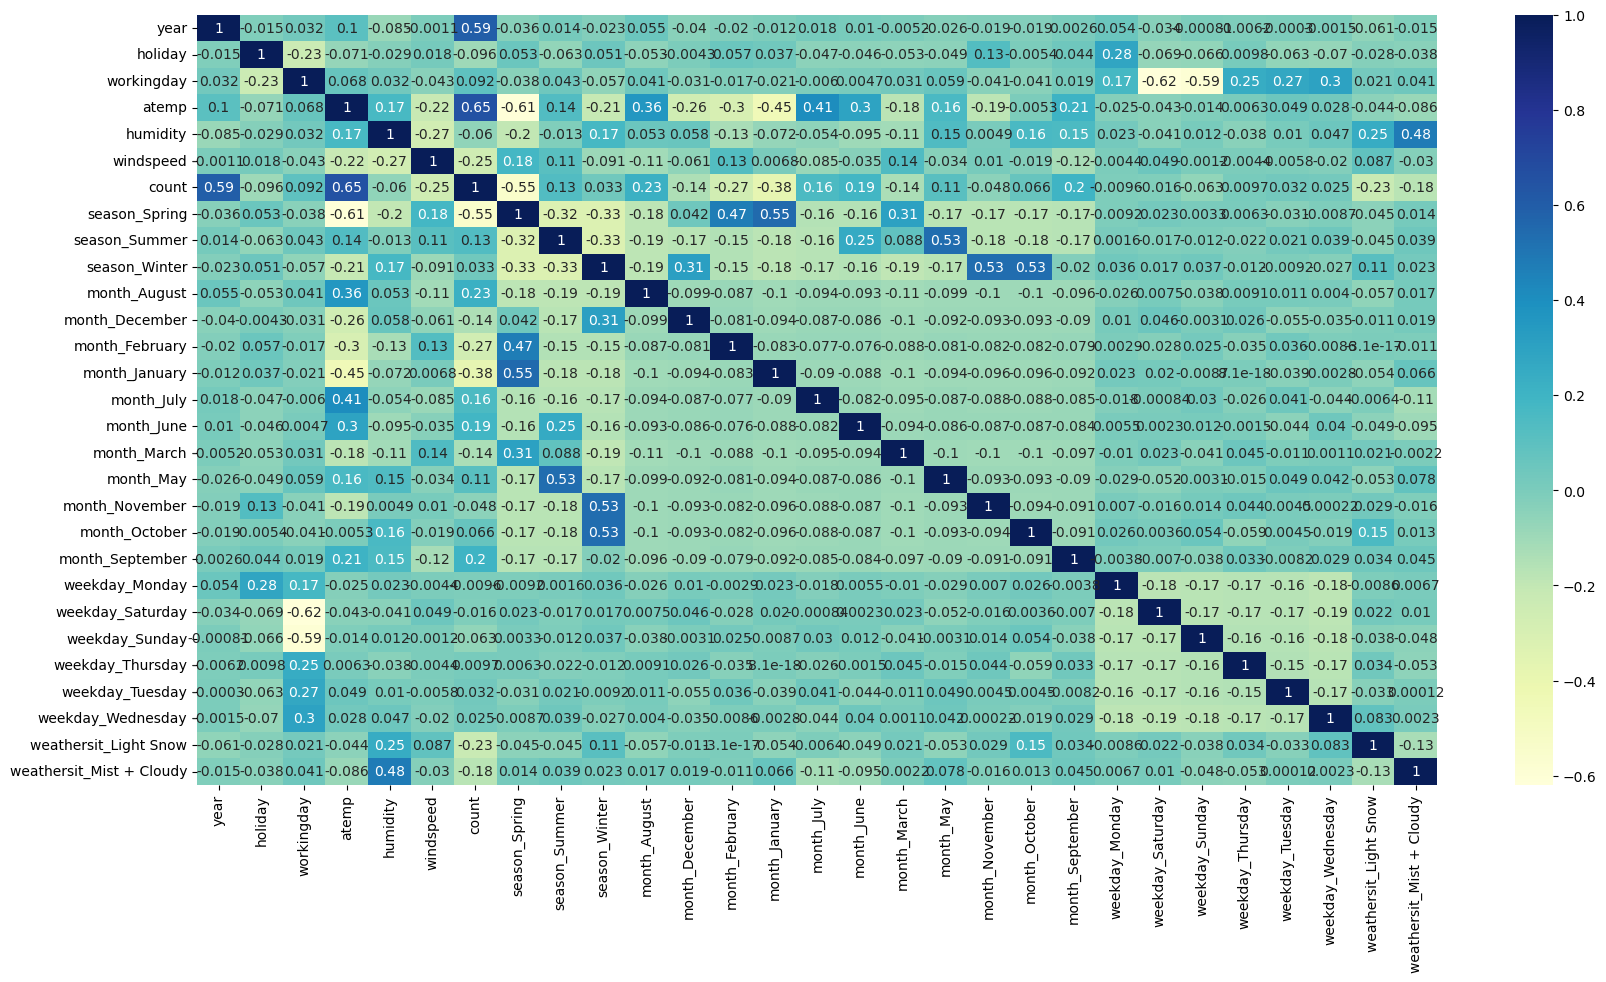

In [24]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As it is clearly noticed, `atemp` seems to the correlated to `count` the most followed by the `year`.<br>
Also  `season_Spring` is highly negatively correlated.<br>
Let's see a pairplot for `atemp` vs `count`.


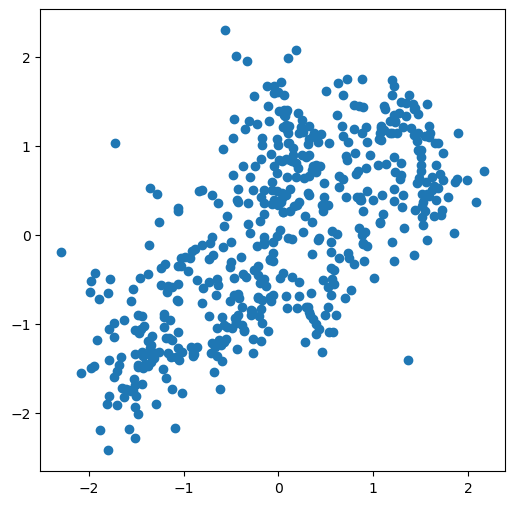

In [25]:
plt.figure(figsize=[6,6])
plt.scatter(df_train['count'], df_train.atemp)
plt.show()

#### Dividing into X and Y sets for the model building

In [26]:
y_train = df_train.pop('count')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

#### Adding all the variables to the model

In [27]:
X_train

,year,holiday,workingday,atemp,humidity,windspeed,season_Spring,season_Summer,season_Winter,month_August,...,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist + Cloudy
653,1,0,1,-0.055878,-0.514725,-0.117752,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,1.194106,0.516433,-0.330615,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,-0.348834,-0.069854,-0.385694,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,-1.473492,-1.045032,2.018143,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,-0.571474,-1.000840,-0.779889,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,1.174464,-0.305544,0.205320,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
578,1,0,1,1.467501,0.201190,-0.787759,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,-1.386775,-1.471329,-1.234384,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,-1.364170,-0.497048,0.654645,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [28]:
y_train

653    1.562685
576    1.399629
426   -0.215554
728   -1.379511
482   -0.136589
         ...   
526    1.116587
578    1.422703
53    -1.317467
350   -0.895981
79    -1.235426
Name: count, Length: 510, dtype: float64

Here we will be using mixed approach:<br>
- First we will use RFE ( Recursive feature elemination) to eleminate features.
- Manual elemination of the features.

In [29]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [30]:
# Running RFE with output number of variables as 18

lmodel = LinearRegression()
lmodel.fit(X_train,y_train)

rfe = RFE(lmodel , n_features_to_select=18)
rfe = rfe.fit(X_train, y_train)


In [31]:
# list of all the columns, their inclusion in model, ranking

list = pd.DataFrame({'Columns' : X_train.columns, 'Included': rfe.support_, 'Ranking' :rfe.ranking_})
list.sort_values(by = 'Ranking')

,Columns,Included,Ranking
0,year,True,1
21,weekday_Saturday,True,1
19,month_September,True,1
17,month_November,True,1
16,month_May,True,1
26,weathersit_Light Snow,True,1
12,month_January,True,1
11,month_February,True,1
10,month_December,True,1
13,month_July,True,1


In [32]:
# lets take list of all columns included in one variable
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'atemp', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'month_December', 'month_February',
       'month_January', 'month_July', 'month_May', 'month_November',
       'month_September', 'weekday_Saturday', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [33]:
# list of columns or features excluded by RFE
X_train.columns[~rfe.support_]

Index(['humidity', 'month_August', 'month_June', 'month_March',
       'month_October', 'weekday_Monday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [34]:
import statsmodels.api as sm

# here creating the function for model fitting and checking VIF

def lin_model(X,y):
    X_train_lm = sm.add_constant(X)          # adding a constant
    lm = sm.OLS(y,X_train_lm).fit()   # Running the linear model
    print(lm.summary())
    return lm

**Model 1** <br>
- Using features selected by RFE ( Recursive feature elemination)

In [35]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
lin_model( X_train_rfe , y_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     148.1
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          4.11e-185
Time:                        17:58:15   Log-Likelihood:                -249.20
No. Observations:                 510   AIC:                             536.4
Df Residuals:                     491   BIC:                             616.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [36]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# creating a function for VIF   
def vif(X):
    vif_df = pd.DataFrame()
    vif_df['Features'] = X.columns
    vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by = "VIF", ascending = False)
    print(vif_df)


In [37]:
vif(X_train_rfe)

                    Features   VIF
5              season_Spring  4.76
2                 workingday  4.02
3                      atemp  3.31
7              season_Winter  3.12
6              season_Summer  2.65
10             month_January  2.50
0                       year  2.00
9             month_February  1.96
13            month_November  1.90
8             month_December  1.71
15          weekday_Saturday  1.70
12                 month_May  1.61
17  weathersit_Mist + Cloudy  1.57
11                month_July  1.45
14           month_September  1.28
1                    holiday  1.16
4                  windspeed  1.15
16     weathersit_Light Snow  1.09


We generally want a VIF that is less than 5. All VIFs are already below 5. <br>
So we need to drop based on P value of the features.

**Model 2**

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `season_Summer` as it has a very high p-value of `0.717` . Let's go ahead and drop this variables

In [38]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe = X_train_rfe.drop('season_Summer', 1,)
lin_model( X_train_rfe , y_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     157.0
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          3.45e-186
Time:                        17:58:16   Log-Likelihood:                -249.27
No. Observations:                 510   AIC:                             534.5
Df Residuals:                     492   BIC:                             610.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [39]:
vif(X_train_rfe)

                    Features   VIF
5              season_Spring  4.15
3                      atemp  3.13
2                 workingday  3.01
6              season_Winter  2.78
9              month_January  2.48
8             month_February  1.95
0                       year  1.90
12            month_November  1.89
7             month_December  1.69
16  weathersit_Mist + Cloudy  1.55
14          weekday_Saturday  1.45
10                month_July  1.41
13           month_September  1.23
11                 month_May  1.22
4                  windspeed  1.14
1                    holiday  1.12
15     weathersit_Light Snow  1.09


**Model 3**

Dropping variable `month_May` as its P value is 0.127.


In [40]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('month_May', 1,)
lin_model( X_train_rfe , y_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     166.3
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          8.39e-187
Time:                        17:58:16   Log-Likelihood:                -250.48
No. Observations:                 510   AIC:                             535.0
Df Residuals:                     493   BIC:                             606.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

**Model 4**

Dropping `holiday` as it is having next highest P value.

In [41]:
X_train_rfe = X_train_rfe.drop('holiday', 1,)
lin_model( X_train_rfe , y_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.6
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          2.12e-187
Time:                        17:58:16   Log-Likelihood:                -251.76
No. Observations:                 510   AIC:                             535.5
Df Residuals:                     494   BIC:                             603.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

**Model 5** 

Dropping `month_February` as it is having next highest P value.

In [42]:
X_train_rfe = X_train_rfe.drop('month_February', 1,)
lin_model( X_train_rfe , y_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.7
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          1.25e-187
Time:                        17:58:16   Log-Likelihood:                -253.94
No. Observations:                 510   AIC:                             537.9
Df Residuals:                     495   BIC:                             601.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

**Model 6**

Dropping `month_November` as it is having next highest P value.

In [43]:
X_train_rfe = X_train_rfe.drop('month_November', 1,)
lin_model( X_train_rfe , y_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.4
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          6.47e-187
Time:                        17:58:16   Log-Likelihood:                -258.40
No. Observations:                 510   AIC:                             544.8
Df Residuals:                     496   BIC:                             604.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

**Model 7**

Dropping `month_December` as it is having next highest P value.

In [44]:
X_train_rfe = X_train_rfe.drop('month_December', 1,)
lin_model( X_train_rfe , y_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.6
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          6.35e-187
Time:                        17:58:16   Log-Likelihood:                -261.17
No. Observations:                 510   AIC:                             548.3
Df Residuals:                     497   BIC:                             603.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

 **Model 8**

Dropping `month_January` as it is having next highest P value.

In [45]:
X_train_rfe = X_train_rfe.drop('month_January', 1,)
lin_model( X_train_rfe , y_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     229.0
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          8.57e-187
Time:                        17:58:16   Log-Likelihood:                -264.30
No. Observations:                 510   AIC:                             552.6
Df Residuals:                     498   BIC:                             603.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [46]:
vif(X_train_rfe)

                    Features   VIF
4              season_Spring  2.67
1                 workingday  2.64
2                      atemp  2.58
0                       year  1.87
5              season_Winter  1.78
10  weathersit_Mist + Cloudy  1.52
8           weekday_Saturday  1.38
6                 month_July  1.34
7            month_September  1.18
3                  windspeed  1.09
9      weathersit_Light Snow  1.08


**Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only**

In [47]:
# lets see the final model
final_model = lin_model(X_train_rfe , y_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     229.0
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          8.57e-187
Time:                        17:58:16   Log-Likelihood:                -264.30
No. Observations:                 510   AIC:                             552.6
Df Residuals:                     498   BIC:                             603.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

With the residual analysis, we can also validate if model is fulfilling the assumptions of linear regression which are :
- Normality: The error terms should follow a normal distribution.
- Independence of residuals: Observations are assumed to be independent of each other.
- Homoscedasticity: The variability of the error terms should be constant across all levels of the independent variable.
- Linearity: The relationship between the variables is assumed to be linear

In [48]:
# predicted values based on final model
X_train_sm = sm.add_constant(X_train_rfe)
y_train_pred = final_model.predict(X_train_sm)

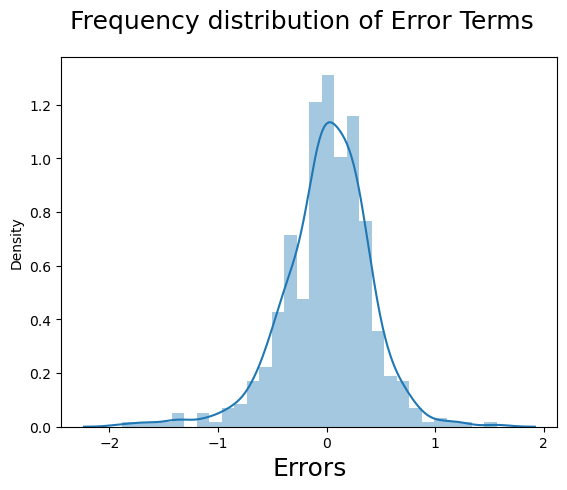

In [49]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 30)
fig.suptitle('Frequency distribution of Error Terms', fontsize = 18)                 
plt.xlabel('Errors', fontsize = 18)  
plt.show()

Here we can see that error terms or residuals are normally districbuted thus proving one of the assumptions of Linear Regression.

Lets check the mean of the residuals , it should be approximatley equal to 0.

In [50]:
# mean of residuals
(y_train-y_train_pred).mean()

-3.430806836880876e-16

This validates the first assumption

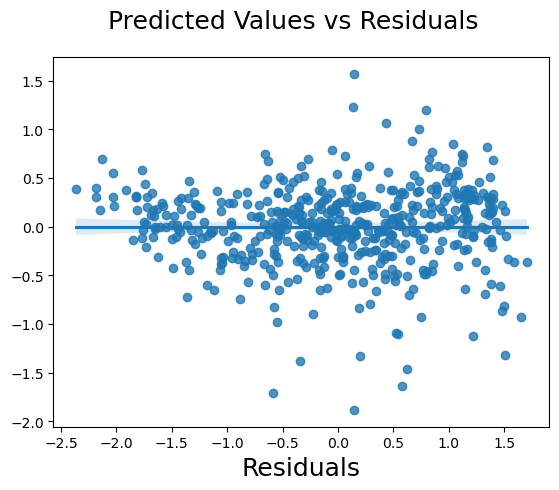

In [51]:
# Distribution of restuals in reg plot
fig = plt.figure()
sns.regplot(x=y_train_pred, y=y_train-y_train_pred, data=df_train)
fig.suptitle('Predicted Values vs Residuals', fontsize = 18)                   
plt.xlabel('Residuals', fontsize = 18)  
plt.show()

- Variance of Errors doesnt follow any trends
- Residual errors are independent of each other since the Predicted values vs Residuals plot doesn't show any trend.

This validates the second assumption of independence of residuals.<br>
Also the equally spread residuals around a horizontal line without distinct patterns are a good indication of having the linear relationships thus satisfying the assumption of linearity.

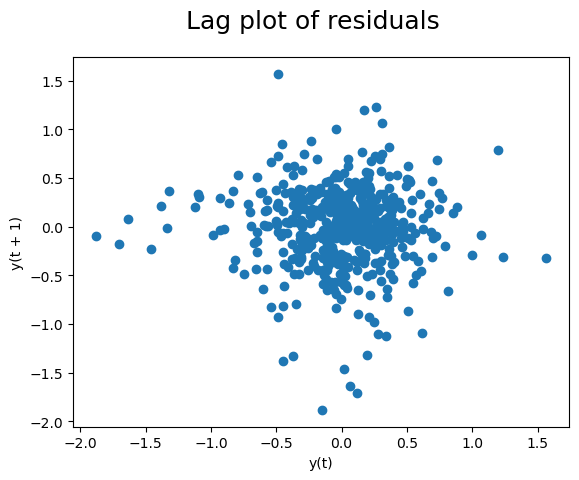

In [52]:
# Lag plot of residuals 
from pandas.plotting import lag_plot

fig = plt.figure()
lag_plot(y_train-y_train_pred)
fig.suptitle('Lag plot of residuals', fontsize = 18)                   
plt.show()


The Residual Lag Plot constructed by plotting residual y(t) against residual y(t+1), is useful for examining the dependency of the error terms. Any non-random pattern in a lag plot suggests that the variance is not random.<br>
Thus satisfying 3rd assumption of Linear Regression i.e.Homoscedasticity

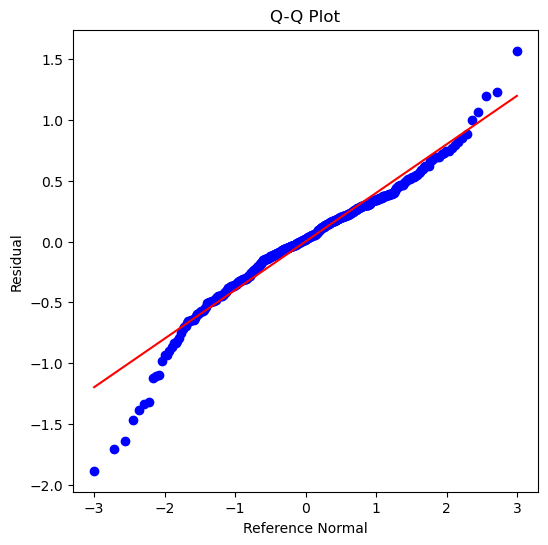

In [53]:
import scipy.stats as stats
plt.figure(figsize=(6, 6))
stats.probplot(y_train-y_train_pred, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.xlabel("Reference Normal")
plt.ylabel("Residual")
plt.show()

This plot further shows that the residual distribution is approximately normal for all test data with values within range of training data.

**Thus model is satisfying all the assumptions of Linear Regression**

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [54]:
# applying scaling on test data
num_vars = ['atemp', 'humidity', 'windspeed','count']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [55]:
df_test.describe()

,year,holiday,workingday,atemp,humidity,windspeed,count,season_Spring,season_Summer,season_Winter,...,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist + Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.094272,-0.081388,-0.043731,0.031073,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,1.026916,1.022197,0.942916,0.973536,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,-2.295437,-2.665411,-2.143341,-2.074296,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-0.792914,-0.844689,-0.720691,-0.606530,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.170654,-0.155290,-0.125622,0.047490,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.947998,0.641963,0.485055,0.709202,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,2.205446,2.413751,2.869216,2.004169,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [56]:
y_test = df_test.pop('count')
X_test = df_test

In [57]:
# getting the list of columns used for training the model
col_test = X_train_rfe.columns
col_test

Index(['year', 'workingday', 'atemp', 'windspeed', 'season_Spring',
       'season_Winter', 'month_July', 'month_September', 'weekday_Saturday',
       'weathersit_Light Snow', 'weathersit_Mist + Cloudy'],
      dtype='object')

In [58]:
# Creating X_test_m4 dataframe using the above columns

X_test_m4 = X_test[col_test]
X_test_m4.columns

Index(['year', 'workingday', 'atemp', 'windspeed', 'season_Spring',
       'season_Winter', 'month_July', 'month_September', 'weekday_Saturday',
       'weathersit_Light Snow', 'weathersit_Mist + Cloudy'],
      dtype='object')

In [59]:
# Making predictions using the final model
X_test_m4 = sm.add_constant(X_test_m4)
y_test_pred = final_model.predict(X_test_m4)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

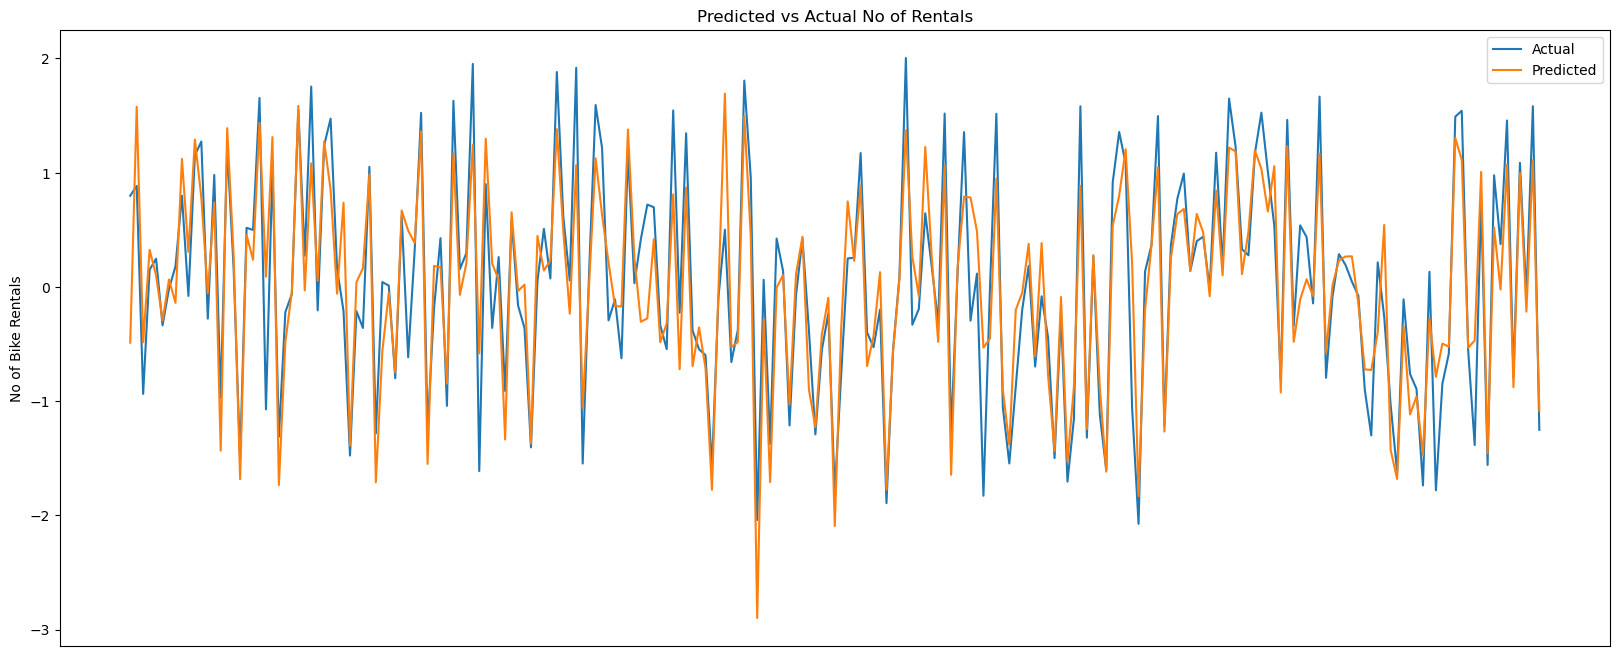

In [60]:
# Plotting Actual vs Predicted rentals 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_test_pred)),y_test_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Rentals');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()


Text(0, 0.5, 'Predicted values')

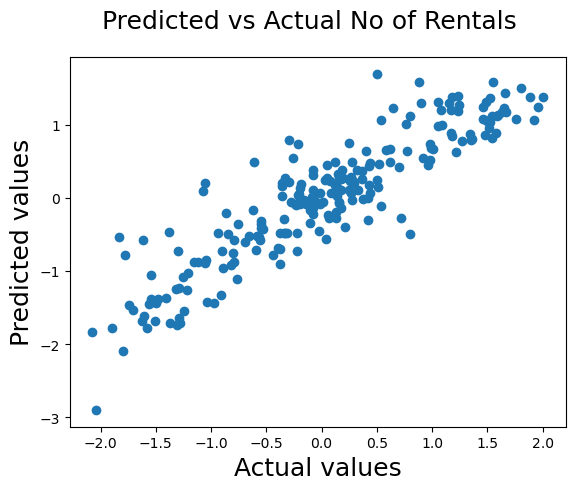

In [61]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('Predicted vs Actual No of Rentals', fontsize = 18)             
plt.xlabel('Actual values', fontsize = 18)                          
plt.ylabel('Predicted values', fontsize = 18)      

In [62]:
# Lets check R squared values and Mean Squared Error for the model

from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_test_pred)
rsquared_test = r2_score(y_test, y_test_pred)
rsquared_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',round(rsquared_train,2))
print('R-squared for test data:',round(rsquared_test,2))
print('Mean Squared Error',round(mse,3))

R-squared for train data: 0.83
R-squared for test data: 0.81
Mean Squared Error 0.176


In [63]:
# R-square using cross validation

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
clr = cross_val_score(lr,X_train_rfe,y_train,cv=10, scoring='r2')
print("R-square at 0.95 confidence level : %0.2f (+/- %0.2f)" % (clr.mean(), clr.std() * 2))

R-square at 0.95 confidence level : 0.82 (+/- 0.06)


In [64]:
# Coefficients and intercept
from sklearn.preprocessing import StandardScaler
reg_features = X_train_rfe.columns
scaler = StandardScaler()
data = X_train_rfe
std_num = scaler.fit(data[['atemp','windspeed']])


std_X_train = pd.DataFrame(data = scaler.transform(data[['atemp','windspeed']]), columns=['atemp','windspeed'])
for i in reg_features : 
    std_X_train[i] = data[i].values


reshaped_y_train = y_train.values.reshape(-1,1)

# Fitting linear regression model 
std_model = lr.fit(std_X_train, reshaped_y_train)

# Coefficients and intercept
result = pd.DataFrame(data = std_model.coef_, columns = std_X_train.columns, index=['MLR Coefficients']).T
result = result.sort_values(by='MLR Coefficients',ascending=False)
print('\nIntercept :',std_model.intercept_)
result


Intercept : [-0.4918898]


,MLR Coefficients
year,1.049202
atemp,0.439435
weekday_Saturday,0.293324
month_September,0.252105
workingday,0.241920
season_Winter,0.178074
windspeed,-0.096158
month_July,-0.291617
weathersit_Mist + Cloudy,-0.370485
season_Spring,-0.525270


We can see that the equation of our best fitted line is:

$ count = -0.49188 + 1.049202 \times  year + 0.439435  \times  atemp -1.274991 \times weathersit_Light Snow -0.525270 \times season_Spring -0.370485 \times weathersit_Mist + Cloudy + 0.293324 \times weekday_Saturday	- 0.291617 \times month_July + 0.252105 \times month_September + 0.241920 \times workingday + 0.178074  \times season_Winter -0.096158 \times windspeed $

- Top features influencing demand are `weathersit_Light Snow` followed by  `year` ,`season_Spring` and `atemp`.
- In case of continuous variables, the above data could be interpreted as - With every standard deviation increase in continuous variables, demand increases by xxx, when all other modelled paramters are held unchanged.
- In case of categorical variables, the above data could be interpreted as - Compared to the reference level, the change in demand is xxx,, when all other modelled paramters are held unchanged.

### Conclusion

- Model is build using a Mixed Approach. 18 features are selected sing Recursive Feature Elimination. Further selection is done   manually by looking at multicollinearity and statistical significance of features and overall fit of the model.
- The 11 most significant features to understand demand have been reported.

- The data set is randomly divided into training and test data in 70 and 30 ratio respectively. 
- Final Model is explaining 83% of the variance in data.Model is successfully able to predict at 81% variance in data
- For scaling the variables, standard scaling is used.

The final relationship between target and predictors is as follows.

$ count = -0.49188 + 1.049202 \times  year + 0.439435  \times  atemp -1.274991 \times weathersit_Light Snow -0.525270 \times season_Spring -0.370485 \times weathersit_Mist + Cloudy + 0.293324 \times weekday_Saturday	- 0.291617 \times month_July + 0.252105 \times month_September + 0.241920 \times workingday + 0.178074  \times season_Winter -0.096158 \times windspeed $





